In [256]:
import numpy as np
import pandas as pd
from tslearn.utils import to_time_series, to_time_series_dataset
from tslearn.neighbors import KNeighborsTimeSeries

In [269]:
nN = 3
init = 100
test_points = 10
out_dim = 2

data = [np.random.rand(10,21) for _ in range(init)]
labels = np.array([list((np.random.randn(1,out_dim)+2)[0]) for _ in range(init)])

Transforming data to tslearn format

In [270]:
time_series = to_time_series_dataset(data)
time_series.shape

(100, 10, 21)

Unknown points

In [271]:
# test = data[0] # same as first known point

test = [np.random.rand(10,21) for _ in range(test_points)]
labels_test = np.array([list((np.random.randn(1,out_dim)+4)[0]) for _ in range(test_points)])

test_time_series = to_time_series_dataset(test)

print(test_time_series.shape)
# print(pred)

(10, 10, 21)


In [272]:
knn = KNeighborsTimeSeries(n_neighbors=nN).fit(time_series)

In [273]:
def knnUncertainty(nN,pred, test_time_series,labels,knn):

    pred = labels
    sigma = []
    distances, indices = knn.kneighbors(test_time_series,nN, return_distance=True)
    
    for i in range(len(test_time_series)):
        # print(i)
        dist = distances[i]
        print(dist)
        ind = (indices[i])
        print(ind)
        #calculate the nearest point error
        pred_near = pred[i]
        # print(pred_near)
        # print(ind)

        abs_err = np.abs(pred_near - labels[ind])
        print(abs_err)
        weights = 1 - (dist / dist.sum())
        print(weights)
        print(weights.shape)
        weights = np.broadcast_to(weights.reshape(len(ind), 1), (len(ind), out_dim))
        print(weights)
        weighted_err = np.mean(np.average(abs_err, weights=weights**nN) )

        nbrs_y = list(labels[ind])
        nbrs_y.append(pred[i])
        nbrs_var = np.std(nbrs_y)

        min_dist = np.min(dist)
        pred_var = weighted_err + min_dist * nbrs_var
        sigma.append(pred_var)
    sigma = np.array(sigma)
    return sigma

In [274]:
knnUncertainty(nN, labels_test, test_time_series,labels,knn)

[5.2643433  5.41558662 5.54684449]
[46 34 42]
[[0.64592201 1.05109316]
 [1.43836852 0.81812986]
 [0.86905284 0.14826472]]
[0.67557672 0.66625612 0.65816715]
(3,)
[[0.67557672 0.67557672]
 [0.66625612 0.66625612]
 [0.65816715 0.65816715]]
[5.44560712 5.56663624 5.59348647]
[58 11 29]
[[3.07817542 1.93968735]
 [0.63568681 1.59110127]
 [0.04326981 2.54575376]]
[0.67206457 0.66477618 0.66315925]
(3,)
[[0.67206457 0.67206457]
 [0.66477618 0.66477618]
 [0.66315925 0.66315925]]
[5.02317208 5.33090485 5.35243949]
[48 34 49]
[[3.11419217 0.72120271]
 [1.30429846 0.51836893]
 [0.48447942 0.64837089]]
[0.68018548 0.66059279 0.65922173]
(3,)
[[0.68018548 0.68018548]
 [0.66059279 0.66059279]
 [0.65922173 0.65922173]]
[5.48248623 5.61529483 5.6346348 ]
[45 48 51]
[[0.64189294 0.35909883]
 [2.72662592 1.06899011]
 [0.83701687 0.65930276]]
[0.67234342 0.66440621 0.66325037]
(3,)
[[0.67234342 0.67234342]
 [0.66440621 0.66440621]
 [0.66325037 0.66325037]]
[5.23867517 5.35932812 5.36932838]
[65 70 86]
[[

array([3.84825754, 7.70857041, 5.77587514, 6.38531108, 3.09688956,
       6.09853551, 5.07023043, 7.57313867, 4.59558623, 5.58583906])

In [ ]:
array([4.1884983 , 1.53541475, 1.5085826 , 2.83379748, 2.94832207,
       1.98689609, 1.92418307, 2.25995833, 2.40071495, 2.42274423])

In [234]:
a = np.array([[0,         0],
 [0.05709389, 0.24707099],
 [0.48952425, 0.23022069]])

In [134]:
a

array([[0.        , 0.        ],
       [0.05709389, 0.24707099],
       [0.48952425, 0.23022069]])

In [137]:
weights = np.array([1, 0.51519018, 0.48480982])
weights

array([1.        , 0.51519018, 0.48480982])

In [215]:
weights.transpose().shape

(3,)

In [213]:
weights.shape

(3,)

In [208]:
weights2 = np.concatenate([[weights, weights]]).transpose()
weights2

array([[1.        , 1.        ],
       [0.51519018, 0.51519018],
       [0.48480982, 0.48480982]])

In [210]:
weights

array([1.        , 0.51519018, 0.48480982])

In [221]:
weights.reshape(3,1)

array([[1.        ],
       [0.51519018],
       [0.48480982]])

In [237]:
weights2 = np.broadcast_to(weights.reshape(3,1), (3,2))

In [136]:
np.mean(np.average(a, axis=0, weights=weights))

0.1264105435210473

In [238]:
np.average(a, weights=weights2)

0.12641054352104727

# Other

In [1]:
from data import load_data
import numpy as np

In [2]:
A,_,vld, train, train_idx, vld_idx = load_data()

In [3]:
train_idx.shape

(80,)

In [4]:
train_idx

array([ 0,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 15, 16, 17, 18, 19,
       22, 24, 25, 26, 27, 28, 30, 31, 32, 33, 34, 35, 36, 38, 39, 40, 41,
       42, 43, 44, 45, 46, 47, 48, 49, 50, 53, 54, 55, 56, 57, 58, 59, 61,
       62, 64, 65, 66, 67, 68, 69, 70, 72, 73, 75, 76, 77, 78, 79, 80, 81,
       83, 85, 88, 89, 90, 93, 94, 95, 96, 97, 98, 99])

In [5]:
vld_idx.shape

(20,)

In [6]:
vld_idx

array([ 1,  2, 14, 20, 21, 23, 29, 37, 51, 52, 60, 63, 71, 74, 82, 84, 86,
       87, 91, 92])

In [7]:
A.shape

(20631, 26)

In [8]:
vld.shape

(1838, 26)

In [9]:
train.shape

(16340, 26)

In [10]:
train.shape[0] + vld.shape[0] == A.shape[0]

False

In [4]:
np.array([X[X.unit_number==i].time.max() for i in X.unit_number.unique()]).min()

31

# Other 2

In [19]:
from preprocessing import build_data
from sklearn.preprocessing import MinMaxScaler
from sklearn import pipeline
from sklearn.feature_selection import VarianceThreshold




In [20]:
 net_cfg={'max_time': 100, 'lr': 0.01, 'num_rec': 3, 'neuron_0': 100, 'activation_0': 'tanh', 'dropout_0': 0.25, 'recurrent_dropout_0': 0.25, 
    'neuron_1': 50, 'activation_1': 'tanh', 'dropout_1': 0.25, 'recurrent_dropout_1': 0.25, 
    'neuron_2': 20, 'activation_2': 'tanh', 'dropout_2': 0.25, 'recurrent_dropout_2': 0.25, 
    'final_activation_0': 'exp', 'final_activation_1': 'softplus', 'percentage': 70, 'rul': 115, 'rul_style': 'nonlinear'}

cfg = {'cv': 10, 'shuffle': True,
        'random_state': 21,
        'mask_value': -99,
        'reps': 30,
        'epochs': 20,
        'batches': 64}
    

In [21]:
train_x_orig, feature_cols, vld_x_orig = load_data()

In [22]:
# Pre-processing data
scaler = pipeline.Pipeline(steps=[
    ('minmax', MinMaxScaler(feature_range=(-1, 1))),
    ('remove_constant', VarianceThreshold())])

In [23]:
train = train_x_orig.copy()
train = np.concatenate([train[['unit_number', 'time']], scaler.fit_transform(train[feature_cols])], axis=1)

vld = vld_x_orig.copy()
vld = np.concatenate([vld[['unit_number', 'time']], scaler.transform(vld[feature_cols])], axis=1)

In [24]:
train_x, train_y = build_data(units=train[:, 0], time=train[:, 1], x=train[:, 2:], max_time=net_cfg['max_time'],
                                    is_test=False, mask_value=cfg['mask_value'],
                                    original_data=None, net_cfg = net_cfg, label=net_cfg['rul_style'])

100%|██████████| 80/80 [00:01<00:00, 70.99it/s]


In [25]:
test_x, test_y = build_data(units=vld[:, 0], time=vld[:, 1], x=vld[:, 2:], max_time=net_cfg['max_time'],
                                is_test=True, mask_value=cfg['mask_value'],
                                original_data=vld_x_orig, net_cfg = net_cfg, label=net_cfg['rul_style'])


100%|██████████| 20/20 [00:00<00:00, 828.77it/s]


# Checking results

In [5]:
import pandas as pd
import matplotlib.pyplot as plt

In [3]:
results = pd.read_csv('./results_no_cv_HO')

In [4]:
results

,fold,rmse_train,mae_train,r2_train,std_train,rmse_test,mae_test,r2_test,std_test,net_cfg
0,NaN,42.202866,36.435107,-27.466119,14.118401,43.845651,38.126250,-53.790583,14.277045,"{""num_rec"": 2, ""max_time"": 15, ""neuron_0"": 56,..."
1,NaN,72.417777,57.954437,-344.628218,12.621413,66.253240,51.226734,-284.823586,12.796667,"{""num_rec"": 3, ""max_time"": 22, ""neuron_0"": 56,..."
2,NaN,38.192010,26.351371,-6.681403,13.402648,23.475921,14.239514,-14.031767,11.297789,"{""num_rec"": 3, ""max_time"": 21, ""neuron_0"": 63,..."
3,NaN,36.173817,23.635571,-303.231498,3.379708,14.918328,10.848296,-197.455496,3.139416,"{""num_rec"": 3, ""max_time"": 26, ""neuron_0"": 81,..."
4,NaN,35.844815,27.606012,-19.304364,5.900217,18.770762,16.478312,-6.391346,6.598509,"{""num_rec"": 3, ""max_time"": 33, ""neuron_0"": 74,..."
5,NaN,37.642555,25.848663,-13.519016,7.560143,20.359301,13.870752,-31.868837,6.248027,"{""num_rec"": 3, ""max_time"": 36, ""neuron_0"": 69,..."
6,NaN,55.147214,46.550768,-1.240077,7.645345,54.716844,46.055594,-23.218774,6.125483,"{""num_rec"": 2, ""max_time"": 26, ""neuron_0"": 88,..."
7,NaN,21.930715,14.549721,-0.339728,11.969555,12.642588,7.638561,-2.650647,12.472796,"{""num_rec"": 2, ""max_time"": 21, ""neuron_0"": 62,..."
8,NaN,2114.228369,156.152675,-0.000217,100.208021,56.462788,53.757092,-5872.060861,2.085399,"{""num_rec"": 3, ""max_time"": 23, ""neuron_0"": 77,..."
9,NaN,23.455651,19.686773,0.081637,4.773383,23.222712,20.095152,-5.096465,4.186386,"{""num_rec"": 3, ""max_time"": 14, ""neuron_0"": 68,..."


<AxesSubplot:xlabel='rmse_test', ylabel='std_test'>

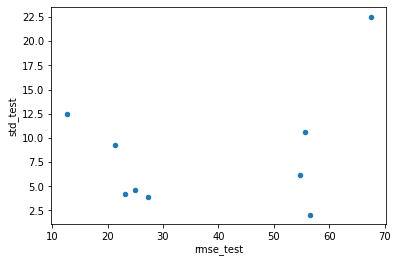

In [13]:
results.iloc[6:].plot.scatter(x='rmse_test', y='std_test')

In [1]:
from subprocess import STDOUT, check_output
import testing, subprocess
import re

Time
Marios
(1, 2, True)


In [2]:
a = testing.func()

Marios


In [3]:
a

(1, 2, True)

In [4]:
cmd = ['python3', 'testing.py']

In [5]:
outs = " "

In [19]:
outs = str(check_output(cmd,stderr=STDOUT, timeout=40000, encoding="utf8"))

In [20]:
outs

'Time\nMarios\n(1, 2, True)\n'

In [17]:
outs = outs.split('\n')

In [18]:
outs

['Time', 'Marios', '(1, 2, True)', '']

In [13]:
a = outs[-2]

In [14]:
a

'(1, 2, True)'

In [15]:
eval(a)

(1, 2, True)

In [32]:
[-1 * float(a[0]), -1 * float(a[1]), bool(a[2])]

ValueError: could not convert string to float: '('

In [28]:
outs = outs.split('\n')

AttributeError: 'list' object has no attribute 'split'

In [24]:
for i in range(len(outs)):
                if re.match(r'\(.*?,.*?\)', outs[i]) is not None:
                    print(outs[i])

(1, 2, True)


In [13]:
outs[0]
tuple(float(s) for s in outs[0].strip("()").split(","))

ValueError: could not convert string to float: ' True'

In [8]:
outs = outs.split("\n")

In [9]:
float(outs[0])

ValueError: could not convert string to float: '(1, 2, 3)'

In [20]:
print(subprocess.check_output(["echo", "abc"]).decode("UTF-8"))


abc



In [15]:
import json
import ast

In [ ]:
json.loads()

In [47]:
x = '{""num_rec"": 3, ""max_time"": 25, ""neuron_0"": 52, ""neuron_1"": 60, ""neuron_2"": 64, ""neuron_3"": 76, ""activation_0"": ""tanh"", ""activation_1"": ""tanh"", ""activation_2"": ""tanh"", ""activation_3"": ""tanh"", ""dropout_0"": 0.8561250305596474, ""dropout_1"": 0.22899941656888817, ""dropout_2"": 0.8091697517210182, ""dropout_3"": 0.6936047955670372, ""recurrent_dropout_0"": 0.3408991901503018, ""recurrent_dropout_1"": 0.08499270270809253, ""recurrent_dropout_2"": 0.8625573676398948, ""recurrent_dropout_3"": 0.6093046986378656, ""final_activation_0"": ""softplus"", ""final_activation_1"": ""softplus"", ""percentage"": 74, ""rul"": 126, ""rul_style"": ""nonlinear"", ""lr"": 0.0026686458174947606}'

In [49]:
y = '{""num_rec"": 3}'

In [42]:
s = '{"success": "true", "status": 200, "message": "Hello"}'

In [34]:
x

'{""num_rec"": 3, ""max_time"": 25, ""neuron_0"": 52, ""neuron_1"": 60, ""neuron_2"": 64, ""neuron_3"": 76, ""activation_0"": ""tanh"", ""activation_1"": ""tanh"", ""activation_2"": ""tanh"", ""activation_3"": ""tanh"", ""dropout_0"": 0.8561250305596474, ""dropout_1"": 0.22899941656888817, ""dropout_2"": 0.8091697517210182, ""dropout_3"": 0.6936047955670372, ""recurrent_dropout_0"": 0.3408991901503018, ""recurrent_dropout_1"": 0.08499270270809253, ""recurrent_dropout_2"": 0.8625573676398948, ""recurrent_dropout_3"": 0.6093046986378656, ""final_activation_0"": ""softplus"", ""final_activation_1"": ""softplus"", ""percentage"": 74, ""rul"": 126, ""rul_style"": ""nonlinear"", ""lr"": 0.0026686458174947606}'

In [50]:
json.loads(y)

JSONDecodeError: Expecting ':' delimiter: line 1 column 4 (char 3)

# Checking Results

In [16]:
import pandas as pd
import pygmo as pg
import matplotlib.pyplot as plt

In [17]:
configs = pd.read_csv('./results_no_cv_HO_14_10')

In [18]:
configs

,fold,rmse_train,mae_train,r2_train,std_train,rmse_test,mae_test,r2_test,std_test,net_cfg
0,NaN,47.126739,37.066848,1.431670e-01,16.705510,52.732910,44.090384,-3.799564e+00,17.741878,"{""num_rec"": 3, ""max_time"": 10, ""neuron_0"": 88,..."
1,NaN,29.493741,25.596311,-5.450720e-01,10.633957,28.223801,24.576717,-5.228669e+00,10.714279,"{""num_rec"": 2, ""max_time"": 30, ""neuron_0"": 58,..."
2,NaN,57.619001,49.331039,-2.895237e+00,12.109116,54.144621,45.366296,-1.452373e+01,10.256495,"{""num_rec"": 2, ""max_time"": 35, ""neuron_0"": 53,..."
3,NaN,17.528350,15.207040,5.916367e-01,6.788340,16.959301,14.858708,-1.122403e+00,6.301888,"{""num_rec"": 2, ""max_time"": 21, ""neuron_0"": 67,..."
4,NaN,22.648530,15.340802,4.812672e-01,11.512218,21.222328,12.689395,-2.599423e+00,9.294063,"{""num_rec"": 3, ""max_time"": 38, ""neuron_0"": 63,..."
...,...,...,...,...,...,...,...,...,...,...
90,NaN,42.066306,37.417135,-3.522895e+08,0.000220,32.818075,30.042801,-2.599070e+11,0.000119,"{""num_rec"": 3, ""max_time"": 27, ""neuron_0"": 67,..."
91,NaN,57.787824,24.312976,-3.812626e+00,14.988095,9.774152,3.553026,-1.489045e+01,19.026989,"{""num_rec"": 3, ""max_time"": 27, ""neuron_0"": 73,..."
92,NaN,38.055068,29.472806,-7.887767e-01,12.878807,34.742033,27.175076,-4.307935e+00,11.789192,"{""num_rec"": 3, ""max_time"": 37, ""neuron_0"": 67,..."
93,NaN,18.462943,12.529512,6.241590e-01,4.960166,19.687354,11.688240,-2.180703e+00,4.066916,"{""num_rec"": 3, ""max_time"": 28, ""neuron_0"": 60,..."


In [19]:
pareto_index = pg.non_dominated_front_2d(configs[['rmse_test', 'std_test']])

In [20]:
pareto_configs = configs.iloc[pareto_index]

In [21]:
pareto_configs

,fold,rmse_train,mae_train,r2_train,std_train,rmse_test,mae_test,r2_test,std_test,net_cfg
49,NaN,7.205645,4.492931,9.570122e-01,12.766777,8.498355,4.273812,5.454138e-01,15.275623,"{""num_rec"": 2, ""max_time"": 32, ""neuron_0"": 71,..."
85,NaN,10.991044,6.422628,8.805414e-01,6.669606,10.225548,4.538545,1.292785e-01,5.704269,"{""num_rec"": 2, ""max_time"": 25, ""neuron_0"": 74,..."
38,NaN,24.568569,14.744286,-9.851250e-01,3.870772,11.670414,6.461367,-8.681744e-01,4.267684,"{""num_rec"": 3, ""max_time"": 40, ""neuron_0"": 51,..."
83,NaN,32.912198,21.774542,-5.198089e+00,5.142660,19.122152,11.483143,-2.099066e+01,4.250191,"{""num_rec"": 3, ""max_time"": 27, ""neuron_0"": 91,..."
93,NaN,18.462943,12.529512,6.241590e-01,4.960166,19.687354,11.688240,-2.180703e+00,4.066916,"{""num_rec"": 3, ""max_time"": 28, ""neuron_0"": 60,..."
37,NaN,25.525738,19.789917,2.540616e-01,6.374443,21.661725,16.902787,-5.771960e+00,3.759553,"{""num_rec"": 3, ""max_time"": 29, ""neuron_0"": 92,..."
72,NaN,43.694999,32.181604,-7.792414e+08,0.003325,22.918496,18.492632,-3.579321e+08,0.003266,"{""num_rec"": 4, ""max_time"": 27, ""neuron_0"": 63,..."
90,NaN,42.066306,37.417135,-3.522895e+08,0.000220,32.818075,30.042801,-2.599070e+11,0.000119,"{""num_rec"": 3, ""max_time"": 27, ""neuron_0"": 67,..."


In [24]:
pareto_configs.iloc[1].net_cfg

'{"num_rec": 2, "max_time": 25, "neuron_0": 74, "neuron_1": 71, "neuron_2": 78, "neuron_3": 68, "activation_0": "tanh", "activation_1": "sigmoid", "activation_2": "sigmoid", "activation_3": "tanh", "dropout_0": 0.04198965650706104, "dropout_1": 0.6518949855946009, "dropout_2": 0.5134433415117658, "dropout_3": 0.44181882048621723, "recurrent_dropout_0": 0.011379281378212352, "recurrent_dropout_1": 0.07877843876273939, "recurrent_dropout_2": 0.25685072170110057, "recurrent_dropout_3": 0.16640448683710898, "final_activation_0": "softplus", "final_activation_1": "softplus", "percentage": 63, "rul": 125, "rul_style": "nonlinear", "lr": 0.021745779733326226, "batch": "256"}'

<AxesSubplot:xlabel='rmse_test', ylabel='std_test'>

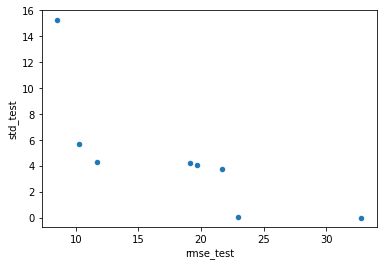

In [23]:
pareto_configs.plot.scatter(x='rmse_test', y='std_test')

# Checking Output

In [4]:
from sklearn.utils import check_random_state

In [10]:
check_random_state(42)

RandomState(MT19937) at 0x7F7104543040

In [18]:
np.random.seed(42)
np.random.choice(range(1,100), replace=False, size=10)


array([63, 41, 96, 19, 98, 85, 65, 43, 11,  1])

In [13]:
from sklearn.model_selection import KFold


In [21]:
test = [14, 20, 51, 60, 71, 74, 82, 86, 91, 92]
train = [x for x in range(0,100) if x not in test]


In [22]:
train

[0,
 1,
 2,
 3,
 4,
 5,
 6,
 7,
 8,
 9,
 10,
 11,
 12,
 13,
 15,
 16,
 17,
 18,
 19,
 21,
 22,
 23,
 24,
 25,
 26,
 27,
 28,
 29,
 30,
 31,
 32,
 33,
 34,
 35,
 36,
 37,
 38,
 39,
 40,
 41,
 42,
 43,
 44,
 45,
 46,
 47,
 48,
 49,
 50,
 52,
 53,
 54,
 55,
 56,
 57,
 58,
 59,
 61,
 62,
 63,
 64,
 65,
 66,
 67,
 68,
 69,
 70,
 72,
 73,
 75,
 76,
 77,
 78,
 79,
 80,
 81,
 83,
 84,
 85,
 87,
 88,
 89,
 90,
 93,
 94,
 95,
 96,
 97,
 98,
 99]

In [8]:
# np.random.get_state(np.random.seed(42))

In [1]:
import os
os.environ["CUDA_VISIBLE_DEVICES"]="-1"

import tensorflow as tf
from preprocessing import build_data
import pandas as pd
import math
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score

import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np


import main



In [2]:
def weibull_mean(alpha, beta):
    return alpha * math.gamma(1 + 1/beta)

In [3]:
model, train_results_df, test_results_df, test_x_orig, test_y_orig, scaler, train_x, test_x = main.main()

/home/kefalasm/Projects/rul_sa/mipego/mipego.py:215: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
  self._levels = np.array([self._space.bounds[i] for i in self._space.id_N]) # levels for discrete variable


{'num_rec': 4, 'max_time': 24, 'neuron_0': 76, 'neuron_1': 75, 'neuron_2': 74, 'neuron_3': 66, 'activation_0': 'tanh', 'activation_1': 'tanh', 'activation_2': 'sigmoid', 'activation_3': 'sigmoid', 'dropout_0': 0.018692516794622607, 'dropout_1': 0.8002018342665917, 'dropout_2': 0.615094589188039, 'dropout_3': 0.08230738757019833, 'recurrent_dropout_0': 0.6421264747391056, 'recurrent_dropout_1': 0.8933998465284962, 'recurrent_dropout_2': 0.6402495109098905, 'recurrent_dropout_3': 0.6693624215836003, 'final_activation_0': 'softplus', 'final_activation_1': 'softplus', 'percentage': 62, 'rul': 124, 'rul_style': 'nonlinear', 'lr': 0.0008896860421074306, 'batch': '32'}
(16340, 26)
(10312, 26)
(100,)


100%|██████████| 100/100 [00:00<00:00, 18239.28it/s]


train_x (16340, 24, 17) train_y (16340, 1) test_x (100, 24, 17) test_y (100, 1)


/home/kefalasm/rul_nn/lib/python3.8/site-packages/tensorflow/python/keras/optimizer_v2/optimizer_v2.py:374: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  warnings.warn(


Model: "weibull_params"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         [(None, 24, 17)]          0         
_________________________________________________________________
masking (Masking)            (None, 24, 17)            0         
_________________________________________________________________
gru (GRU)                    (None, 24, 76)            21660     
_________________________________________________________________
gru_1 (GRU)                  (None, 24, 75)            34425     
_________________________________________________________________
gru_2 (GRU)                  (None, 24, 74)            33522     
_________________________________________________________________
gru_3 (GRU)                  (None, 66)                28116     
_________________________________________________________________
dense (Dense)                (None, 2)              

In [4]:
model

In [56]:
samples = []
for i in range(30):
            tf.random.set_seed(i)
            train_predict = model(train_x, training=True).numpy()
            a, b = train_predict[:,0], train_predict[:,1]
            # print(a.shape)
            # print(b.shape)
            samples.append(b.reshape(-1,1)*np.random.weibull(a.reshape(-1,1), size=(a.shape[0], 30)))


In [53]:
samples = []
for i in range(train_x.shape[0]):
            tf.random.set_seed(i)
            train_predict = model(train_x[i].reshape(1, train_x[i].shape[0], train_x[i].shape[1]), training=True).numpy()
            a, b = train_predict[:,0], train_predict[:,1]
            samples.append(b.reshape(-1,1)*np.random.weibull(a.reshape(-1,1), size=(a.shape[0], 30)))


In [57]:
samples_np = np.array(samples)

In [59]:
av_samples = samples_np.mean(axis=(0,2))

In [ ]:
std_samples = 

In [60]:
av_samples.shape

(16340,)

In [58]:
samples_np.shape

(30, 16340, 30)

In [40]:
samples_np_res = samples_np.reshape(16340, 30, 30)

In [44]:
samples_np[0]

array([[0.9618107 , 1.04142468, 1.00540641, ..., 1.01739777, 0.99993366,
        1.00546528],
       [1.36661558, 1.31756706, 1.36378124, ..., 1.38536189, 1.36411834,
        1.37223075],
       [1.40620352, 1.46856562, 1.44948386, ..., 1.47280346, 1.45468624,
        1.42846906],
       ...,
       [1.34590152, 1.37506518, 1.45324525, ..., 1.3929937 , 1.3431232 ,
        1.35434488],
       [2.0830767 , 2.1249126 , 1.93023953, ..., 1.82320148, 2.06567726,
        2.01907402],
       [0.62423504, 0.63893257, 0.64039052, ..., 0.65123273, 0.61201843,
        0.63794652]])

(30, 16340)

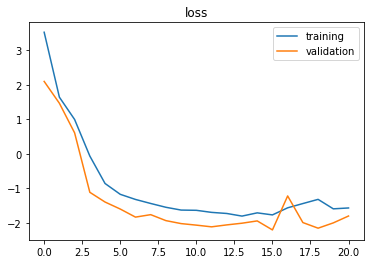

In [5]:
plt.plot(model.history.history['loss'],    label='training')
plt.plot(model.history.history['val_loss'],label='validation')
plt.title('loss')
plt.legend()

In [6]:
def plot_weibull_predictions(results_df, unit):

#     fig, axarr = plt.subplots(3, figsize=(30,20))
    
    plt.figure(figsize=(30,10))

    t=np.arange(0,400)

    palette = sns.color_palette("RdBu_r", results_df.shape[0] + 1)
    color_dict = dict(enumerate(palette))

#     ax=axarr[0]
    
#     median_predictions = weibull_median(results_df['alpha'], results_df['beta'])
    mean_predictions =  results_df['predicted_mu'] # results_df[['alpha', 'beta']].apply(lambda row: weibull_mean(row[0], row[1]), axis=1)
    std_plus = results_df['predicted_std+']
    std_minus = results_df['predicted_std-']

    x = results_df['time']
    
    plt.plot(x, results_df['T'], label='survival_time', color='black')

#     ax.plot(x, median_predictions, label='median_prediction')
    plt.plot(x, mean_predictions, label='mean_prediction')
#     ax.plot(x, mode_predictions, label='mode_prediction')
#     ax.set_title('MAP prediction Vs. true')
    plt.plot(x, std_plus, 'g-')
    plt.plot(x, std_minus, 'g-')
    

    plt.legend()
    
#     ax=axarr[1]
#     sns.distplot(results_df['T'] - mode_predictions, ax=ax)
#     ax.set_title('Error')

#     ax.plot(x, results_df['alpha'], label='alpha')
#     ax.legend()
    
    
#     ax = axarr[2]
#     ax.plot(x, results_df['beta'], label='beta')
#     ax.legend()
    
#     ax.legend(loc='center left', bbox_to_anchor=(1, 0.5))
    plt.suptitle(unit)
    plt.show()

In [7]:
train_results_df

,T,mean_alpha,mean_beta,std_alpha,std_beta,unit_number,time,predicted_mu,predicted_std+,predicted_std-
0,122.000000,96.203529,3.645533,3.770054,0.431752,0,0,86.748732,88.166844,85.333415
1,122.000000,121.619675,132.124435,0.988990,3.912071,0,1,121.095195,121.453018,120.737289
2,122.000000,121.810455,132.852997,0.285707,8.844648,0,2,121.287996,121.401811,121.173624
3,122.000000,121.868935,134.645859,0.090869,0.260275,0,3,121.353096,121.385828,121.320364
4,122.000000,121.858360,134.723724,0.191705,0.086567,0,4,121.342861,121.411289,121.274433
...,...,...,...,...,...,...,...,...,...,...
16335,7.820513,11.152440,2.529965,5.385028,0.945047,99,195,9.898149,11.657563,8.170187
16336,6.256410,13.382037,2.716044,7.575679,0.995231,99,196,11.902850,14.386036,9.457016
16337,4.692308,9.676654,2.402920,4.894915,0.870619,99,197,8.578375,10.164844,7.019355
16338,3.128205,9.925006,2.162857,5.226829,0.921916,99,198,8.789619,10.464895,7.156942


In [8]:
test_results_df

,T,mean_alpha,mean_beta,std_alpha,std_beta,predicted_mu,predicted_std+,predicted_std-
0,122.0,121.911201,134.755417,0.139946,0.034701,121.395598,121.445512,121.345684
1,122.0,121.925529,134.739639,0.027265,0.075436,121.409806,121.419623,121.399989
2,122.0,121.796440,130.882309,0.669236,20.527868,121.266278,121.532599,120.996811
3,122.0,121.887016,134.747925,0.124645,0.034406,121.371487,121.415949,121.327026
4,122.0,121.920372,134.707703,0.048906,0.172628,121.404550,121.422210,121.386890
...,...,...,...,...,...,...,...,...
95,122.0,121.093788,125.325783,3.207476,30.359280,120.543634,121.729945,119.350119
96,122.0,121.378822,130.707977,2.918635,21.735647,120.849783,121.919249,119.777192
97,122.0,121.549248,128.712845,1.813550,23.342920,121.011363,121.690004,120.328661
98,122.0,121.617500,130.663040,1.388767,21.987885,121.087241,121.611904,120.559077


In [6]:
test_results_df['T'].unique()

array([125.        , 100.74626866,  97.01492537, 108.76623377,
        71.42857143, 118.50649351, 118.15068493,  94.17808219,
       118.05555556,  67.70833333,  68.03797468, 101.02739726,
       117.75362319,  98.80952381,  74.36708861,  88.23529412,
        77.98165138,  74.5412844 , 119.31818182,  94.93670886])

In [7]:
net_cfg = {"num_rec": 2, "max_time": 25, "neuron_0": 74, "neuron_1": 71, "neuron_2": 78, "neuron_3": 68,
     "activation_0": "tanh", "activation_1": "sigmoid", "activation_2": "sigmoid", "activation_3": "tanh",
      "dropout_0": 0.04198965650706104, "dropout_1": 0.6518949855946009, "dropout_2": 0.5134433415117658,
       "dropout_3": 0.44181882048621723, "recurrent_dropout_0": 0.011379281378212352, "recurrent_dropout_1": 0.07877843876273939,
        "recurrent_dropout_2": 0.25685072170110057, "recurrent_dropout_3": 0.16640448683710898, "final_activation_0": "softplus",
         "final_activation_1": "softplus", "percentage": 63, "rul": 125, "rul_style": "nonlinear", "lr": 0.021745779733326226, "batch": "256"}

In [8]:
id_col = 'unit_number'
time_col = 'time'
max_time = 32
mask_value = -99

feature_cols = ['op_setting_1', 'op_setting_2', 'op_setting_3'] + ['sensor_measurement_{}'.format(x) for x in
                                                                    range(1, 22)]
column_names = [id_col, time_col] + feature_cols
test_or = test_x_orig.copy()
test_or = np.concatenate([test_or[['unit_number', 'time']], scaler.transform(test_or[feature_cols])], axis=1)


# Preparing data for the RNN (numpy arrays)
test_or, _ = build_data(units=test_or[:, 0], time=test_or[:, 1], x=test_or[:, 2:], max_time=net_cfg['max_time'],
                                is_test=True, mask_value=-99,
                                original_data=np.repeat(200, test_or.shape[0]), net_cfg = net_cfg, label=net_cfg['rul_style'])


100%|██████████| 100/100 [00:00<00:00, 11852.33it/s]


In [9]:
reps = 30
test_predict_1_or = []
test_predict_2_or = []
for _ in range(reps):
    test_predict_or = model(test_or, training=True).numpy()
#     print(test_predict_or.shape)
#     break
    test_predict_1_or.append(test_predict_or[:,0].reshape(test_predict_or[:,0].shape[0], 1))
    test_predict_2_or.append(test_predict_or[:,1].reshape(test_predict_or[:,1].shape[0], 1))

test_predict_1_mean_or = np.average(np.hstack(test_predict_1_or), axis=1)
test_predict_2_mean_or = np.average(np.hstack(test_predict_2_or), axis=1)
test_predict_1_mean_or = test_predict_1_mean_or.reshape(test_predict_1_mean_or.shape[0],1)
test_predict_2_mean_or = test_predict_2_mean_or.reshape(test_predict_2_mean_or.shape[0],1)
test_predict_1_std_or = np.std(np.hstack(test_predict_1_or), axis=1)
test_predict_2_std_or = np.std(np.hstack(test_predict_2_or), axis=1)
test_predict_1_std_or = test_predict_1_std_or.reshape(test_predict_1_std_or.shape[0],1)
test_predict_2_std_or = test_predict_2_std_or.reshape(test_predict_2_std_or.shape[0],1)


test_predict_or = np.hstack([test_predict_1_mean_or, test_predict_2_mean_or, 
                           test_predict_1_std_or, test_predict_2_std_or])    

test_predict_or = np.resize(test_predict_or, (test_or.shape[0], 4))  # changed from 2 to 4
test_result_or = np.concatenate((test_y_orig, test_predict_or), axis=1)
test_results_df_or = pd.DataFrame(test_result_or, columns=['T',   'mean_alpha', 'mean_beta', 'std_alpha', 'std_beta']) # (add 'E' for event)
#     test_results_df['unit_number'] = train_x_orig.iloc[test_index]['unit_number'].to_numpy() # Note the train_x_orig
#     test_results_df['time'] = train_x_orig.iloc[test_index]['time'].to_numpy()

test_results_df_or['predicted_mu'] = test_results_df_or[['mean_alpha', 'mean_beta']].apply(lambda row: weibull_mean(row[0], row[1]), axis=1)
test_results_df_or['predicted_std+'] = test_results_df_or[['mean_alpha', 'mean_beta', 'std_alpha', 
                                                       'std_beta']].apply(lambda row: weibull_mean(row[0]+1.96*row[2]/np.sqrt(reps), 
                                                                                                   row[1]+1.96*row[3]/np.sqrt(reps)), axis=1)
test_results_df_or['predicted_std-'] = test_results_df_or[['mean_alpha', 'mean_beta', 'std_alpha', 
                                                           'std_beta']].apply(lambda row: weibull_mean(row[0]-1.96*row[2]/np.sqrt(reps),
                                                                                                       row[1]-1.96*row[3]/np.sqrt(reps)), axis=1)




# Old way
# test_predict_or = model(test_or, training=True).numpy()  # equivalent to model.predict(test_or) but with training=False
# test_predict_or = np.resize(test_predict_or, (test_or.shape[0], 2))
# test_result_or = np.concatenate((test_y_orig, test_predict_or), axis=1)
# test_results_df_or = pd.DataFrame(test_result_or, columns=['T', 'alpha', 'beta'])
# test_results_df_or['unit_number'] = np.arange(1, test_results_df_or.shape[0]+1)

# test_results_df_or['predicted_mu'] = test_results_df_or[['alpha', 'beta']].apply(lambda row: weibull_mean(row[0], row[1]), axis=1)

In [13]:
test_results_df_or

,T,mean_alpha,mean_beta,std_alpha,std_beta,predicted_mu,predicted_std+,predicted_std-
0,112.0,121.540070,126.536407,1.399125,29.582317,120.993099,121.533387,120.445685
1,98.0,119.832550,114.064934,7.399041,40.311722,119.235185,121.937332,116.517549
2,69.0,98.066124,7.432370,12.052597,2.917181,92.016971,96.681518,87.275808
3,82.0,119.928566,97.289795,4.457213,45.020847,119.229450,120.914267,117.509738
4,91.0,117.269119,72.467743,8.728762,54.930058,116.356865,119.652224,112.937775
...,...,...,...,...,...,...,...,...
95,137.0,121.894890,132.743622,0.156349,9.051878,121.371643,121.439665,121.303026
96,82.0,116.792091,87.026649,9.401556,55.188030,116.032546,119.517178,112.479078
97,59.0,93.961090,7.197634,13.987807,1.238818,88.021235,92.990818,83.056717
98,117.0,121.672379,130.402939,1.049241,21.640886,121.140835,121.544179,120.734021


In [22]:
#1 - 10 epochs
np.sqrt(mean_squared_error(test_results_df_or['predicted_mu'], test_results_df_or['T']))

22.722882031178447

In [14]:
#1 - 50 epochs
np.sqrt(mean_squared_error(test_results_df_or['predicted_mu'], test_results_df_or['T']))

24.564004081102265

In [10]:
#2 - 21/50 epochs
np.sqrt(mean_squared_error(test_results_df_or['predicted_mu'], test_results_df_or['T']))

33.43200166203946

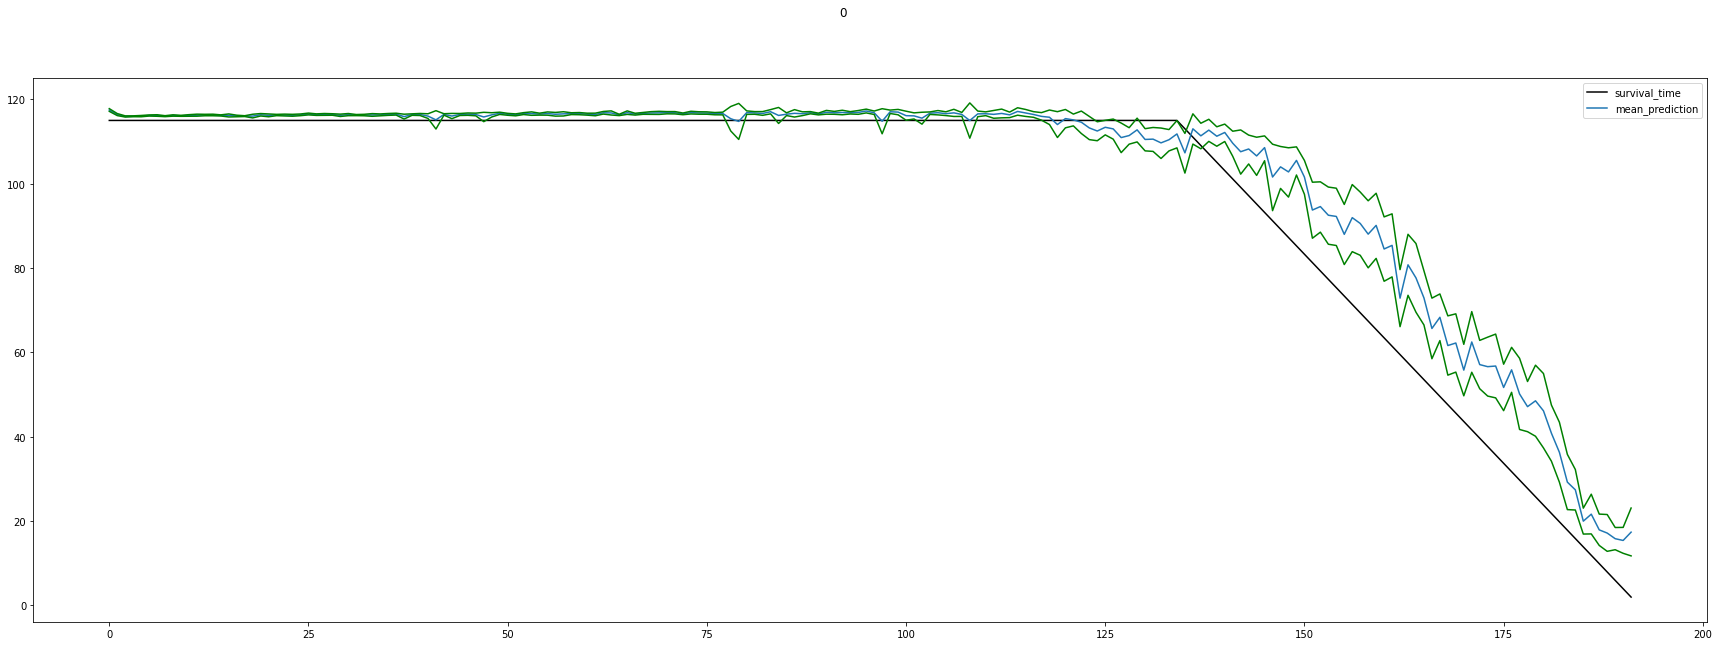

In [15]:
for unit_number, grp in train_results_df.groupby('unit_number'):
    plot_weibull_predictions(grp, unit_number)
    break

In [16]:
for unit_number, grp in test_results_df.groupby('unit_number'):
    plot_weibull_predictions(grp, unit_number)
    break

KeyError: 'unit_number'

# Training full model on the best HP

In [1]:
import os
os.environ["CUDA_DEVICE_ORDER"]="PCI_BUS_ID"
os.environ["CUDA_VISIBLE_DEVICES"]="-1"  # uncomment in case running ONLY on CPU is required

import tensorflow as tf
tf.random.set_seed(42)
from tensorflow.keras import backend as k
from tensorflow.keras import callbacks
from tensorflow.keras.callbacks import History
from tensorflow import keras
from tensorflow.keras.optimizers import Adam

from activations import Activate
from losses import CustomLoss
from preprocessing import build_data

import numpy as np
import pandas as pd

from sklearn import pipeline
from sklearn.feature_selection import VarianceThreshold
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
from sklearn.model_selection import KFold
from sklearn.preprocessing import MinMaxScaler

In [2]:
net_cfg = {'num_rec': 4, 'max_time': 24, 'neuron_0': 76, 'neuron_1': 75, 'neuron_2': 74, 'neuron_3': 66, 'activation_0': 'tanh',
     'activation_1': 'tanh', 'activation_2': 'sigmoid', 'activation_3': 'sigmoid', 'dropout_0': 0.018692516794622607,
      'dropout_1': 0.8002018342665917, 'dropout_2': 0.615094589188039, 'dropout_3': 0.08230738757019833, 'recurrent_dropout_0': 0.6421264747391056,
       'recurrent_dropout_1': 0.8933998465284962, 'recurrent_dropout_2': 0.6402495109098905, 'recurrent_dropout_3': 0.6693624215836003,
        'final_activation_0': 'softplus', 'final_activation_1': 'softplus', 'percentage': 62, 'rul': 124, 'rul_style': 'nonlinear',
         'lr': 0.0008896860421074306, 'batch': '32'}

In [3]:
cfg = {'cv': 10, 'shuffle': True,
'random_state': 21,
'mask_value': -99,
'reps': 30,
'epochs': 1,
'batches': 64}

In [4]:
def network(train_X, train_y, net_cfg, cfg):
    k.set_epsilon(1e-10)
    history = History()
    nan_terminator = callbacks.TerminateOnNaN()
    reduce_lr = callbacks.ReduceLROnPlateau(monitor='loss')
    early_stopping = callbacks.EarlyStopping(monitor='loss', patience=5)
    #     tensorboard = callbacks.TensorBoard(log_dir = './logs_2D')

    window = train_X.shape[1]
    n_features = train_X.shape[2]

    inputs = keras.Input(shape=(window, n_features))
    masking_layer = keras.layers.Masking(mask_value=cfg['mask_value'])(inputs)

    # recurrent layers
    if net_cfg['num_rec'] > 1:
        for i in np.arange(net_cfg['num_rec']-1):
            masking_layer = keras.layers.GRU(net_cfg['neuron_'+str(i)], activation=net_cfg['activation_'+str(i)],
                                    dropout=net_cfg['dropout_'+str(i)],
                                    recurrent_dropout=net_cfg['recurrent_dropout_'+str(i)],
                                    return_sequences=True)(masking_layer)
    last = i + 1
    gru_last = keras.layers.GRU(net_cfg['neuron_'+str(last)], activation=net_cfg['activation_'+str(last)],
                                dropout=net_cfg['dropout_'+str(last)],
                                recurrent_dropout=net_cfg['recurrent_dropout_'+str(last)],
                                return_sequences=False)(masking_layer)

    dense_1 = keras.layers.Dense(2)(gru_last)
    custom_activation = Activate(net_cfg=net_cfg)
    outputs = keras.layers.Activation(custom_activation)(dense_1)

    model = keras.Model(inputs=inputs, outputs=outputs, name="weibull_params")

    # rmse = tf.keras.metrics.RootMeanSquaredError()
    model.compile(loss=CustomLoss(kind='continuous', reduce_loss=True), optimizer=Adam(lr=net_cfg['lr'],
                                                                                       clipvalue=0.5))
    model.summary()  # uncomment for debugging

    batch_size=eval(net_cfg['batch'])
    model.fit(train_X, train_y,
              epochs=cfg['epochs'],
              batch_size=eval(net_cfg['batch']),
              verbose=1,
              callbacks=[nan_terminator, history, reduce_lr, early_stopping],  # , tensorboard
              workers=32)

    return model, history



In [5]:
def load_data():

    np.random.seed(42)

    id_col = 'unit_number'
    time_col = 'time'
    feature_cols = ['op_setting_1', 'op_setting_2', 'op_setting_3'] + ['sensor_measurement_{}'.format(x) for x in
                                                                       range(1, 22)]
    column_names = [id_col, time_col] + feature_cols

    train_x_orig = pd.read_csv('./DataSets/CMAPSS/train_FD001.csv', header=None, sep='\s+', decimal=".")
    train_x_orig.columns = column_names

    test_x_orig = pd.read_csv('./DataSets/CMAPSS/test_FD001.csv', header=None, sep='\s+', decimal=".")
    test_x_orig.columns = column_names

    test_y_orig = pd.read_csv('./DataSets/CMAPSS/RUL_FD001.csv', header=None, names=['T'])

    # Make engine numbers and days zero-indexed
    train_x_orig.iloc[:, 0:2] -= 1
    test_x_orig.iloc[:, 0:2] -= 1

    # Pre-processing data
    scaler = pipeline.Pipeline(steps=[
        ('minmax', MinMaxScaler(feature_range=(-1, 1))),
        ('remove_constant', VarianceThreshold())])

    train = train_x_orig.copy()
    train = np.concatenate([train[['unit_number', 'time']], scaler.fit_transform(train[feature_cols])], axis=1)

    train_x, train_y = build_data(units=train[:, 0], time=train[:, 1], x=train[:, 2:], max_time=net_cfg['max_time'],
                                    is_test=False, mask_value=cfg['mask_value'],
                                    original_data=None, net_cfg = net_cfg, label=net_cfg['rul_style'])

    test_or = test_x_orig.copy()
    test_or = np.concatenate([test_or[['unit_number', 'time']], scaler.transform(test_or[feature_cols])], axis=1)


    # Preparing data for the RNN (numpy arrays)
    test_or, _ = build_data(units=test_or[:, 0], time=test_or[:, 1], x=test_or[:, 2:], max_time=net_cfg['max_time'],
                                    is_test=True, mask_value=-99,
                                    original_data=np.repeat(200, test_or.shape[0]), net_cfg = net_cfg, label=net_cfg['rul_style'])

    

    return train_x, train_y, test_or, test_y_orig


In [14]:
obj =Activate(net_cfg)

In [24]:
Activate.from_config(obj.get_config())

TypeError: __init__() missing 1 required positional argument: 'net_cfg'

In [22]:
obj.get_config()

{'func1': 'softplus', 'func2': 'softplus'}

In [6]:
train_x, train_y, test_x, test_y = load_data()


100%|██████████| 100/100 [00:00<00:00, 16643.40it/s]


In [7]:
print('train_x', train_x.shape, 'train_y', train_y.shape, 'test_x', test_x.shape, 'test_y', test_y.shape)


train_x (20631, 24, 17) train_y (20631, 1) test_x (100, 24, 17) test_y (100, 1)


In [8]:
k.clear_session()
try:
    del model
except:
    pass

model, history = network(train_x, train_y, net_cfg, cfg)

/home/kefalasm/rul_nn/lib/python3.8/site-packages/tensorflow/python/keras/optimizer_v2/optimizer_v2.py:374: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  warnings.warn(


Model: "weibull_params"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         [(None, 24, 17)]          0         
_________________________________________________________________
masking (Masking)            (None, 24, 17)            0         
_________________________________________________________________
gru (GRU)                    (None, 24, 76)            21660     
_________________________________________________________________
gru_1 (GRU)                  (None, 24, 75)            34425     
_________________________________________________________________
gru_2 (GRU)                  (None, 24, 74)            33522     
_________________________________________________________________
gru_3 (GRU)                  (None, 66)                28116     
_________________________________________________________________
dense (Dense)                (None, 2)              

In [9]:
model

In [52]:
import matplotlib.pyplot as plt

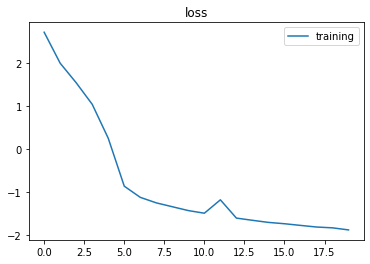

In [53]:
plt.plot(model.history.history['loss'],    label='training')
plt.title('loss')
plt.legend()

In [10]:
model.save('./my_model2')

INFO:tensorflow:Assets written to: ./my_model2/assets


INFO:tensorflow:Assets written to: ./my_model2/assets


In [62]:
import importlib

In [17]:
new_model = tf.keras.models.load_model('./my_model2', custom_objects={"CustomLoss": CustomLoss, "Activate": obj})

TypeError: __init__() missing 1 required positional argument: 'net_cfg'

In [56]:
test_x.shape

(100, 24, 17)

In [57]:
model(test_x, training=True).numpy()

InternalError: Failed copying input tensor from /job:localhost/replica:0/task:0/device:CPU:0 to /job:localhost/replica:0/task:0/device:GPU:0 in order to run Cast: Dst tensor is not initialized. [Op:Cast]

In [55]:
reps = 30
test_predict_1_or = []
test_predict_2_or = []
for _ in range(reps):
    test_predict_or = model(test_x, training=True).numpy()
#     print(test_predict_or.shape)
#     break
    test_predict_1_or.append(test_predict_or[:,0].reshape(test_predict_or[:,0].shape[0], 1))
    test_predict_2_or.append(test_predict_or[:,1].reshape(test_predict_or[:,1].shape[0], 1))

test_predict_1_mean_or = np.average(np.hstack(test_predict_1_or), axis=1)
test_predict_2_mean_or = np.average(np.hstack(test_predict_2_or), axis=1)
test_predict_1_mean_or = test_predict_1_mean_or.reshape(test_predict_1_mean_or.shape[0],1)
test_predict_2_mean_or = test_predict_2_mean_or.reshape(test_predict_2_mean_or.shape[0],1)
test_predict_1_std_or = np.std(np.hstack(test_predict_1_or), axis=1)
test_predict_2_std_or = np.std(np.hstack(test_predict_2_or), axis=1)
test_predict_1_std_or = test_predict_1_std_or.reshape(test_predict_1_std_or.shape[0],1)
test_predict_2_std_or = test_predict_2_std_or.reshape(test_predict_2_std_or.shape[0],1)


test_predict_or = np.hstack([test_predict_1_mean_or, test_predict_2_mean_or, 
                           test_predict_1_std_or, test_predict_2_std_or])    

test_predict_or = np.resize(test_predict_or, (test_or.shape[0], 4))  # changed from 2 to 4
test_result_or = np.concatenate((test_y, test_predict_or), axis=1)
test_results_df_or = pd.DataFrame(test_result_or, columns=['T',   'mean_alpha', 'mean_beta', 'std_alpha', 'std_beta']) # (add 'E' for event)
#     test_results_df['unit_number'] = train_x_orig.iloc[test_index]['unit_number'].to_numpy() # Note the train_x_orig
#     test_results_df['time'] = train_x_orig.iloc[test_index]['time'].to_numpy()

test_results_df_or['predicted_mu'] = test_results_df_or[['mean_alpha', 'mean_beta']].apply(lambda row: weibull_mean(row[0], row[1]), axis=1)
test_results_df_or['predicted_std+'] = test_results_df_or[['mean_alpha', 'mean_beta', 'std_alpha', 
                                                       'std_beta']].apply(lambda row: weibull_mean(row[0]+1.96*row[2]/np.sqrt(reps), 
                                                                                                   row[1]+1.96*row[3]/np.sqrt(reps)), axis=1)
test_results_df_or['predicted_std-'] = test_results_df_or[['mean_alpha', 'mean_beta', 'std_alpha', 
                                                           'std_beta']].apply(lambda row: weibull_mean(row[0]-1.96*row[2]/np.sqrt(reps),
                                                                                                       row[1]-1.96*row[3]/np.sqrt(reps)), axis=1)




# Old way
# test_predict_or = model(test_or, training=True).numpy()  # equivalent to model.predict(test_or) but with training=False
# test_predict_or = np.resize(test_predict_or, (test_or.shape[0], 2))
# test_result_or = np.concatenate((test_y_orig, test_predict_or), axis=1)
# test_results_df_or = pd.DataFrame(test_result_or, columns=['T', 'alpha', 'beta'])
# test_results_df_or['unit_number'] = np.arange(1, test_results_df_or.shape[0]+1)

# test_results_df_or['predicted_mu'] = test_results_df_or[['alpha', 'beta']].apply(lambda row: weibull_mean(row[0], row[1]), axis=1)

ResourceExhaustedError: OOM when allocating tensor with shape[76,76] and type float on /job:localhost/replica:0/task:0/device:GPU:0 by allocator GPU_0_bfc [Op:StridedSlice] name: weibull_params/gru/gru_cell/strided_slice/

In [54]:
train_predict_1 = []
train_predict_2 = []

success = True

for i in range(cfg['reps']):
    tf.random.set_seed(i)
    train_predict = model(train_x, training=True).numpy()
    train_predict_1.append(train_predict[:, 0].reshape(train_predict[:, 0].shape[0], 1))
    train_predict_2.append(train_predict[:, 1].reshape(train_predict[:, 1].shape[0], 1))

train_predict_1_mean = np.mean(np.hstack(train_predict_1), axis=1)
train_predict_2_mean = np.mean(np.hstack(train_predict_2), axis=1)
train_predict_1_mean = train_predict_1_mean.reshape(train_predict_1_mean.shape[0], 1)
train_predict_2_mean = train_predict_2_mean.reshape(train_predict_2_mean.shape[0], 1)
train_predict_1_std = np.std(np.hstack(train_predict_1), axis=1)
train_predict_2_std = np.std(np.hstack(train_predict_2), axis=1)
train_predict_1_std = train_predict_1_std.reshape(train_predict_1_std.shape[0], 1)
train_predict_2_std = train_predict_2_std.reshape(train_predict_2_std.shape[0], 1)

train_predict = np.hstack([train_predict_1_mean, train_predict_2_mean,
                            train_predict_1_std, train_predict_2_std])

train_predict = np.resize(train_predict, (train_x.shape[0], 4))  # changed from 2 to 4
train_result = np.concatenate((train_y, train_predict), axis=1)
train_results_df = pd.DataFrame(train_result, columns=['T', 'mean_alpha', 'mean_beta', 'std_alpha',
                                                        'std_beta'])  # (add 'E' for event)
train_results_df['unit_number'] = train_x_orig['unit_number'].to_numpy()
train_results_df['time'] = train_x_orig['time'].to_numpy()

train_results_df['predicted_mu'] = train_results_df[['mean_alpha', 'mean_beta']].apply(
    lambda row: weibull_mean(row[0], row[1]), axis=1)
train_results_df['predicted_std+'] = train_results_df[['mean_alpha', 'mean_beta', 'std_alpha',
                                                        'std_beta']].apply(
    lambda row: weibull_mean(row[0] + 1.96 * row[2] / np.sqrt(cfg['reps']),
                                row[1] + 1.96 * row[3] / np.sqrt(cfg['reps'])), axis=1)
train_results_df['predicted_std-'] = train_results_df[['mean_alpha', 'mean_beta', 'std_alpha',
                                                        'std_beta']].apply(
    lambda row: weibull_mean(row[0] - 1.96 * row[2] / np.sqrt(cfg['reps']),
                                row[1] - 1.96 * row[3] / np.sqrt(cfg['reps'])), axis=1)

ResourceExhaustedError: OOM when allocating tensor with shape[20631,24,17] and type float on /job:localhost/replica:0/task:0/device:GPU:0 by allocator GPU_0_bfc [Op:Cast]